In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch

In [19]:
df=pd.read_csv('/content/drive/MyDrive/ExcelR/Assignment/Clustering/EastWestAirlines1.csv')

In [20]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [21]:
df_norm=preprocessing.scale(df)

In [22]:
df_norm=pd.DataFrame(df_norm)

In [23]:
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


Find the number of cluster could happen

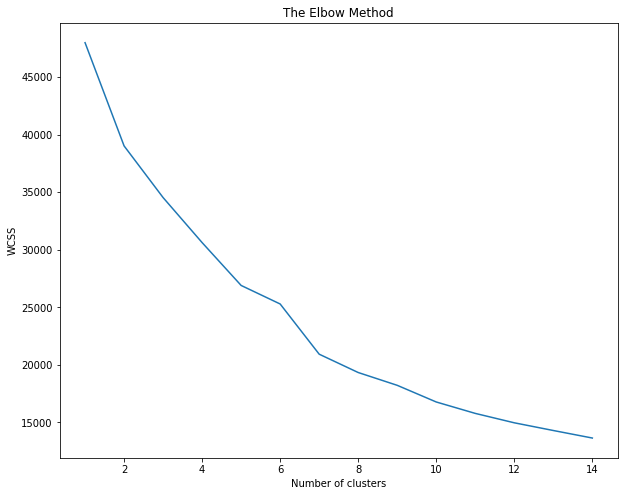

In [24]:
plt.figure(figsize=(10,8))
wcss=[]
for i in range(1,15):
  kmeans= KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

There is a change at 2 but only taking 2 cluster is not enough so will split it more 

## Using Euclidean Distance

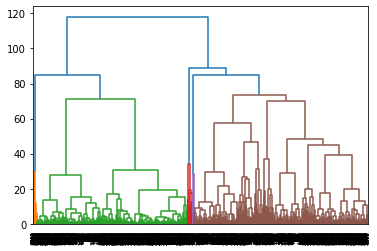

In [25]:
dendogram= sch.dendrogram(sch.linkage(df_norm,method='ward'))

At some point above 80 we get 3 cluster

In [17]:
x=df_norm.values

In [26]:
model= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [27]:
h_clusters=model.fit(x)

In [28]:
labels=model.labels_

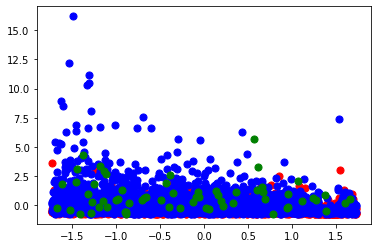

In [29]:
plt.scatter(x[labels==0,0],x[labels==0,1],s=50,marker='o',color='r')
plt.scatter(x[labels==1,0],x[labels==1,1],s=50,marker='o',color='b')
plt.scatter(x[labels==2,0],x[labels==2,1],s=50,marker='o',color='g')

## Find K Means

In [30]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
k_means=kmeans.fit_predict(df_norm)

In [31]:
k_means

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [32]:
k_means1=k_means+1
k_cluster=list(k_means1)

In [33]:
df['k_cluster']=k_cluster

In [34]:
pd.DataFrame(round(df.groupby(k_cluster).mean(),1))

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_cluster
1,2327.1,42243.6,91.1,1.2,1.0,1.0,4896.4,7.0,194.4,0.6,3549.8,0.2,1.0
2,1445.6,119557.7,165.6,3.6,1.0,1.0,38921.2,18.6,351.2,1.1,5147.4,0.6,2.0
3,1753.1,189304.2,788.7,2.2,1.0,1.0,31780.5,27.1,5420.4,15.8,4657.0,0.8,3.0


In [35]:
pd.DataFrame(round(df.groupby(k_cluster).count(),1))

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,k_cluster
1,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525
2,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310
3,164,164,164,164,164,164,164,164,164,164,164,164,164


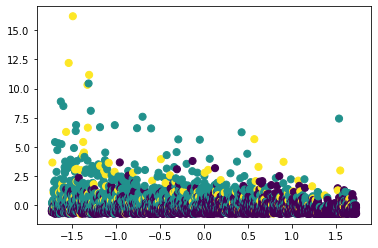

In [36]:
plt.scatter(x[:,0],x[:,1],c=k_means,s=50,cmap='viridis')

From the above analysis we can say that cluster 1 has around 63% total travellers and cluster 2 has around 33% travellers.Cluster 1 travellers are mostly first timer or less travellng,if they will get discount they can travell more